# Image Classification for Jual.In Applications Android

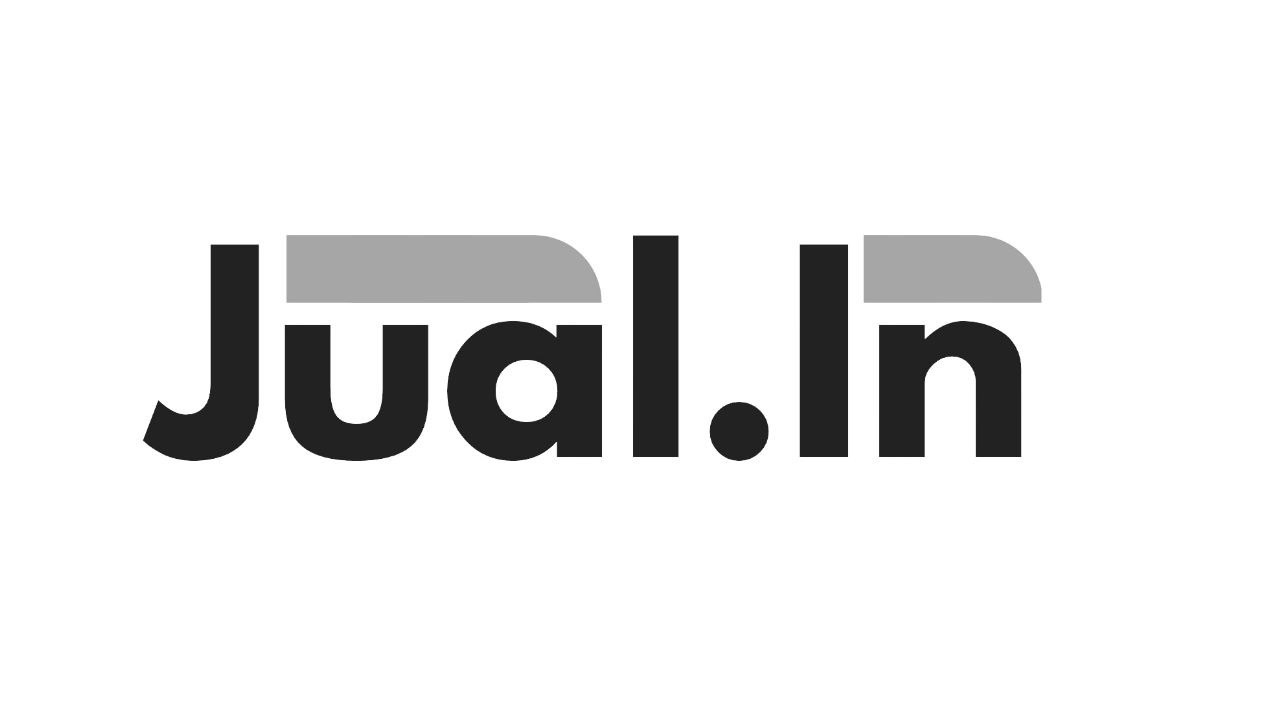

Jual.In is a Bangkit 2023 Product Capstone Project created by C23-PS416 Machine Learning Team for classifying some product in Indonesia SME's

For the first development, we will only focus on two product areas, which are culinary and fashion. We really hope that for the next development, we can add more fields or products that we can classify.



## Import All Required Libraries

In [1]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# Libraries for manage the file in os and in the gdrive.
from google.colab import drive, files
import cv2
import os
import splitfolders

# Libraries for do visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Libraries for Image Classification Modelling
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from tensorflow.config.experimental import list_physical_devices
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Libraries for do computational task
import numpy as np
import pandas as pd



In [3]:
print("Num GPUs Available: ", len(list_physical_devices('GPU')))

Num GPUs Available:  1


## Mount Google Drive to Colab

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Change directory to folder **MyDrive**

In [5]:
%cd '/content/gdrive/MyDrive/'

/content/gdrive/MyDrive


# Load and Spliting Data Into Training, Validation, and Testing


1.   Training 80%
2.   Validation 10%
3.   Testing 10%



In [ ]:
BASE_DIR = '/content/gdrive/MyDrive/Dataset_v2/'
SPLIT_DIR = '/content/gdrive/MyDrive/SplitData_v3/'

splitfolders.ratio(BASE_DIR,
                   output=SPLIT_DIR,
                   seed=42,
                   ratio=(.8,.1,.1),
                   group_prefix=None,
                   move=False)

Copying files: 7500 files [03:08, 39.76 files/s] 


In [6]:
TRAIN_DIR = '/content/gdrive/MyDrive/SplitData_v3/train'
VAL_DIR = '/content/gdrive/MyDrive/SplitData_v3/val'
TEST_DIR = '/content/gdrive/MyDrive/SplitData_v3/test'

## Check if There Are Unreadable Images in Each Folder.

In [7]:
def check_image_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            try:
                image = cv2.imread(file_path)
                if image is None:
                    print(f"The Image {file_path} is Unreadable")
            except Exception as e:
                print(f"Errors Occur When Reading the Image {file_path}: {str(e)}")
    print(f'All Image in {folder_path} is Fine')

# Check Data Training
check_image_files(TRAIN_DIR)

#Check Data Validation
check_image_files(VAL_DIR)

#Check Data Testing
check_image_files(TEST_DIR)

All Image in /content/gdrive/MyDrive/SplitData_v3/train is Fine
All Image in /content/gdrive/MyDrive/SplitData_v3/val is Fine
All Image in /content/gdrive/MyDrive/SplitData_v3/test is Fine


## Calculate the Number of Classes and Images in Each Class

In [8]:
def count_files_in_subfolders(folder_path):
    num_classes = 0

    for root, dirs, files in os.walk(folder_path):
      num_classes += len(dirs)
    print('Number of classes:', num_classes)

    for root, dirs, files in os.walk(folder_path):  
      for dir_name in dirs:
        subfolder_path = os.path.join(root, dir_name)
        file_count = len(os.listdir(subfolder_path))
        print('Number of files in', dir_name, 'class:', file_count)

In [9]:
#Count Data Training
count_files_in_subfolders(TRAIN_DIR)

Number of classes: 25
Number of files in Sate Ayam class: 240
Number of files in Roti Bakar class: 240
Number of files in Bakso class: 240
Number of files in Topi class: 240
Number of files in Baju class: 240
Number of files in Sepatu class: 240
Number of files in Tas class: 240
Number of files in Celana class: 240
Number of files in Ayam Goreng Tepung class: 240
Number of files in Sendal class: 240
Number of files in Gaun class: 240
Number of files in Dompet class: 240
Number of files in MakeUp class: 240
Number of files in Kacamata class: 240
Number of files in Jam Tangan class: 240
Number of files in Kaos Kaki class: 240
Number of files in Kopi class: 240
Number of files in Keripik class: 240
Number of files in Martabak Manis class: 240
Number of files in Jus class: 240
Number of files in Mie Goreng class: 240
Number of files in Mie Ayam class: 240
Number of files in Nasi Goreng class: 240
Number of files in Parfum class: 240
Number of files in Pisang Goreng class: 240


In [10]:
#Count Data Validation
count_files_in_subfolders(VAL_DIR)

Number of classes: 25
Number of files in Sate Ayam class: 30
Number of files in Roti Bakar class: 30
Number of files in Bakso class: 30
Number of files in Topi class: 30
Number of files in Baju class: 30
Number of files in Sepatu class: 30
Number of files in Tas class: 30
Number of files in Celana class: 30
Number of files in Ayam Goreng Tepung class: 30
Number of files in Sendal class: 30
Number of files in Gaun class: 30
Number of files in Dompet class: 30
Number of files in MakeUp class: 30
Number of files in Kacamata class: 30
Number of files in Jam Tangan class: 30
Number of files in Kaos Kaki class: 30
Number of files in Kopi class: 30
Number of files in Keripik class: 30
Number of files in Martabak Manis class: 30
Number of files in Jus class: 30
Number of files in Mie Goreng class: 30
Number of files in Mie Ayam class: 30
Number of files in Nasi Goreng class: 30
Number of files in Parfum class: 30
Number of files in Pisang Goreng class: 30


In [11]:
# Count Data Testing
count_files_in_subfolders(TEST_DIR)

Number of classes: 25
Number of files in Sate Ayam class: 30
Number of files in Roti Bakar class: 30
Number of files in Bakso class: 30
Number of files in Topi class: 30
Number of files in Baju class: 30
Number of files in Sepatu class: 30
Number of files in Tas class: 30
Number of files in Celana class: 30
Number of files in Ayam Goreng Tepung class: 30
Number of files in Sendal class: 30
Number of files in Gaun class: 30
Number of files in Dompet class: 30
Number of files in MakeUp class: 30
Number of files in Kacamata class: 30
Number of files in Jam Tangan class: 30
Number of files in Kaos Kaki class: 30
Number of files in Kopi class: 30
Number of files in Keripik class: 30
Number of files in Martabak Manis class: 30
Number of files in Jus class: 30
Number of files in Mie Goreng class: 30
Number of files in Mie Ayam class: 30
Number of files in Nasi Goreng class: 30
Number of files in Parfum class: 30
Number of files in Pisang Goreng class: 30


In [12]:
# Define Class Names
class_names = ['Ayam Goreng Tepung', 'Baju', 'Bakso', 'Celana', 'Dompet',
               'Gaun', 'Jam Tangan', 'Jus', 'Kacamata', 'Kaos Kaki',
               'Keripik', 'Kopi', 'MakeUp', 'Martabak Manis', 'Mie Ayam',
               'Mie Goreng', 'Nasi Goreng', 'Parfum', 'Pisang Goreng', 'Roti Bakar',
               'Sate Ayam', 'Sendal', 'Sepatu', 'Tas', 'Topi']

## Display an Example of the Image We Will be Working With

In [13]:
def show_images(img_files):
  plt.figure()
  fig = plt.figure(figsize=(10, 10))
  fig.patch.set_facecolor('xkcd:gray')

  for i in range(len(img_files)):
        plt.subplot(5,5,i+1)    
        img=mpimg.imread(img_files[i])
        plt.imshow(img)
        plt.tight_layout()
        plt.axis('off')
        plt.title(img_files[i].split("/")[6]) 
    
  plt.show()


def list_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        for name in files:
          if name.endswith(('.jpg', '.jpeg', '.wbep')):
            arr.append(os.path.join(root, name))
            break
    return arr

['/content/gdrive/MyDrive/SplitData_v3/train/Sate Ayam/resep-sate-ayam-bumbu-ketumbar.jpeg', '/content/gdrive/MyDrive/SplitData_v3/train/Roti Bakar/7dd050c8-4f76-470b-91a1-3afeadbd007a_169.jpeg', '/content/gdrive/MyDrive/SplitData_v3/train/Bakso/Bakso_mi_bihun.jpeg', '/content/gdrive/MyDrive/SplitData_v3/train/Topi/21439.jpg', '/content/gdrive/MyDrive/SplitData_v3/train/Baju/25520.jpg', '/content/gdrive/MyDrive/SplitData_v3/train/Sepatu/36137.jpg', '/content/gdrive/MyDrive/SplitData_v3/train/Tas/7102.jpg', '/content/gdrive/MyDrive/SplitData_v3/train/Celana/15341.jpg', '/content/gdrive/MyDrive/SplitData_v3/train/Ayam Goreng Tepung/5f7179288c95d.jpeg', '/content/gdrive/MyDrive/SplitData_v3/train/Sendal/11940.jpg', '/content/gdrive/MyDrive/SplitData_v3/train/Gaun/33486.jpg', '/content/gdrive/MyDrive/SplitData_v3/train/Dompet/17088.jpg', '/content/gdrive/MyDrive/SplitData_v3/train/MakeUp/55234.jpg', '/content/gdrive/MyDrive/SplitData_v3/train/Kacamata/8938.jpg', '/content/gdrive/MyDrive/Sp

<Figure size 640x480 with 0 Axes>

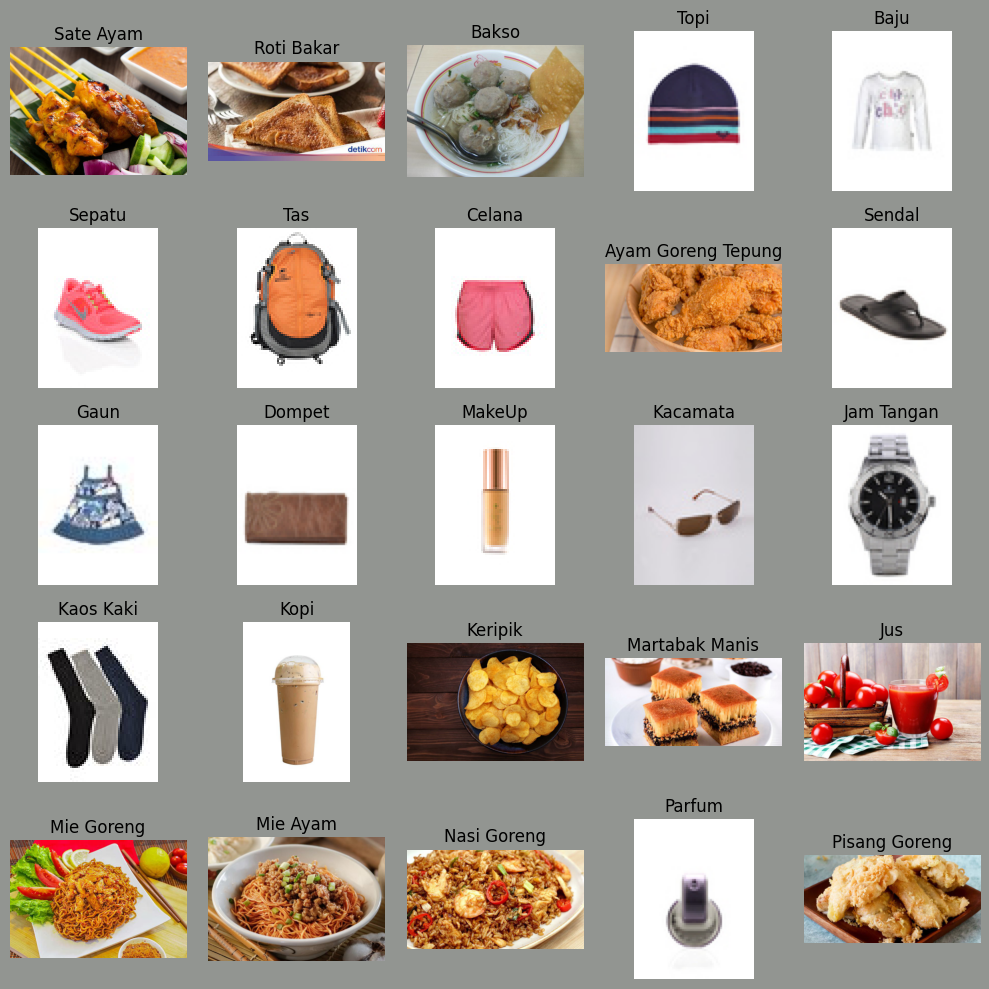

In [14]:
img_list = list_files(TRAIN_DIR)
print(img_list)
show_images(img_list)

## Image Preprocessing

Do Data Augmentation

In [15]:
# ImageDataGenerator for Training Data
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   width_shift_range=0.15,
                                   shear_range=0.2,
                                   height_shift_range=0.15,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

# ImageDataGenerator for Validation Data
val_datagen = ImageDataGenerator(rescale=1./255.)

# ImageDataGenerator for Testing Data
test_datagen = ImageDataGenerator(rescale=1./255.)

In [16]:
#Hyperparameter
IMG_SIZE = (224, 224)
BATCH_SIZE = 256
CLASS_MODE = 'categorical'
SEED = 42

In [17]:
train_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                              class_mode=CLASS_MODE,
                                              batch_size=BATCH_SIZE,
                                              target_size=IMG_SIZE,
                                              seed=SEED)

val_set = val_datagen.flow_from_directory(VAL_DIR,
                                          class_mode=CLASS_MODE,
                                          batch_size=BATCH_SIZE,
                                          target_size=IMG_SIZE,
                                          seed=SEED)

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            class_mode=CLASS_MODE,
                                            batch_size=BATCH_SIZE,
                                            target_size=IMG_SIZE,
                                            seed=SEED)

Found 5939 images belonging to 25 classes.
Found 740 images belonging to 25 classes.
Found 742 images belonging to 25 classes.


In [18]:
# Create variabel x_train and y_train
x_train, y_train = train_set.next()

# Create variabel x_val and y_val
x_val, y_val = val_set.next()

# Create variabel x_test and y_test
x_test, y_test = test_set.next()

In [19]:
print('Training Data Shape x =', x_train.shape, 'y =', y_train.shape)
print('Validation Data Shape x =', x_val.shape, 'y =', y_val.shape)
print('Testing Data Shape x =', x_test.shape, 'y =', y_test.shape)

Training Data Shape x = (256, 224, 224, 3) y = (256, 25)
Validation Data Shape x = (256, 224, 224, 3) y = (256, 25)
Testing Data Shape x = (256, 224, 224, 3) y = (256, 25)


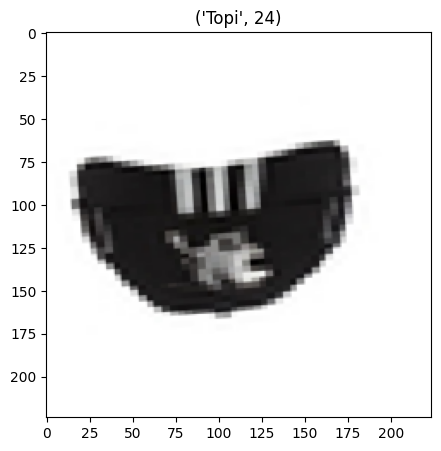

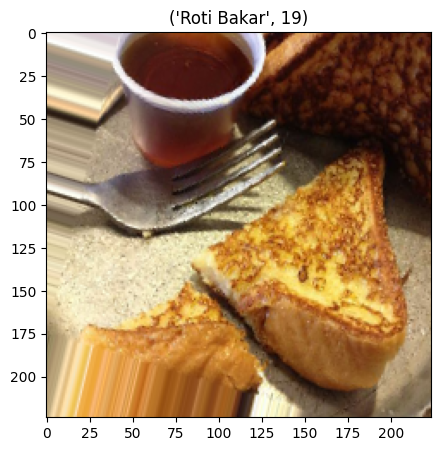

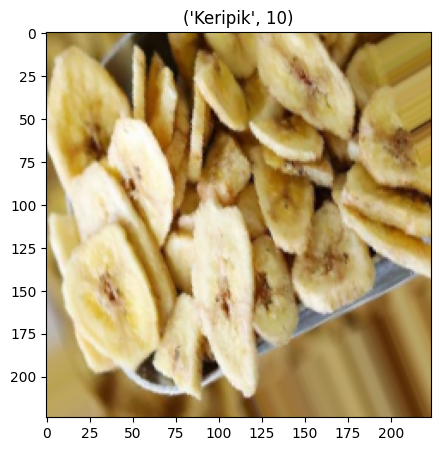

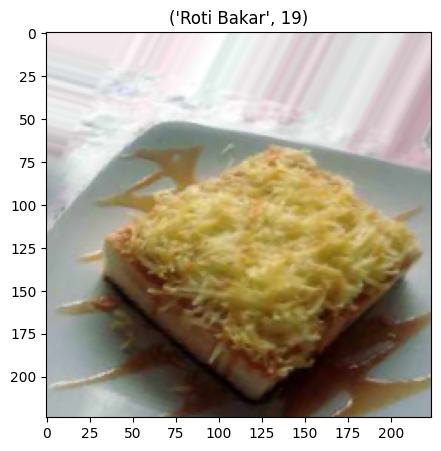

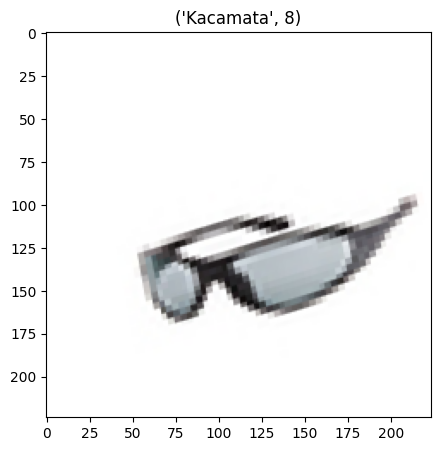

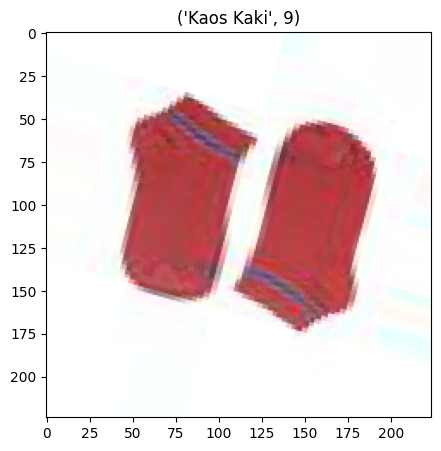

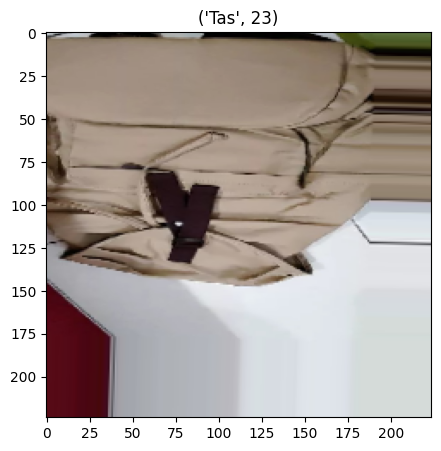

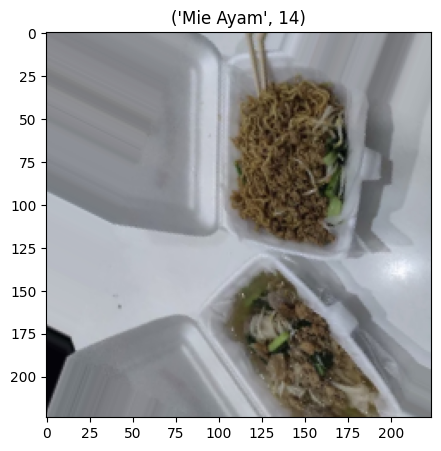

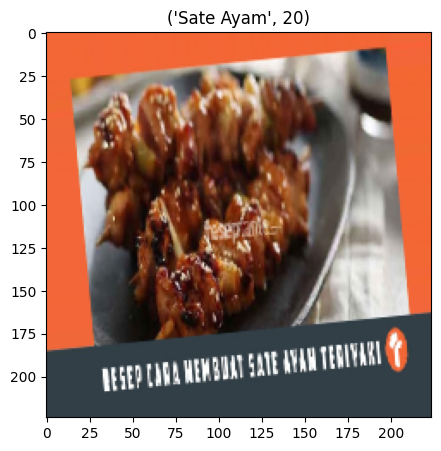

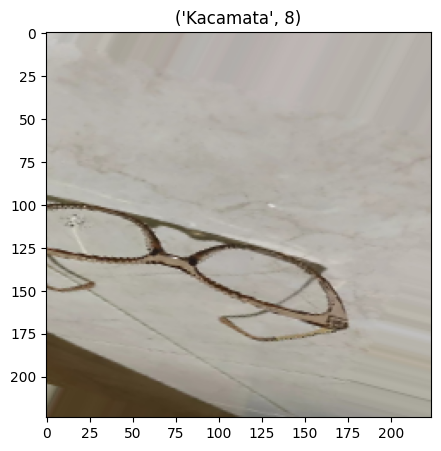

In [20]:
# Inspect the Image After Augmentation Process
curr_y_train = np.argmax(y_train, axis=1)
class_dict = train_set.class_indices.items()

class_dict = [list(class_dict)[label] for label in curr_y_train[:10]]

for idx in range(10):
    plt.figure(figsize=(5, 5))
    plt.imshow(x_train[idx], vmin=0, vmax=255)
    plt.title(class_dict[idx])

# Built The Model

Define Callback For Avoid Overfitting

In [21]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.98:
            print("\nReached 98.0% accuracy so cancelling training!")
            self.model.stop_training = True    

Build Model with InceptionV3 Pre-trained Model and Connect with Custom Architecture Layers

In [22]:
xception_model = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in xception_model.layers:
  layer.trainable = False

x = GlobalAveragePooling2D()(xception_model.output)
x = Flatten()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.2)(x)
x = Dense(216, activation='relu')(x)
preds = Dense(25, activation='softmax')(x)

model = Model(inputs=xception_model.input, outputs=preds)

model.summary()

83683744/83683744 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                      

Compile The Model

In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(),
  metrics=['accuracy']
)

Train The Model

In [24]:
callbacks = myCallback()

initial_epochs = 25

history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=initial_epochs,
  verbose=1,
  shuffle=True,
  callbacks=[callbacks]
  )

Epoch 1/25
24/24 [==============================] - 172s 6s/step - loss: 2.4636 - accuracy: 0.5105 - val_loss: 1.3973 - val_accuracy: 0.7743
Epoch 2/25
24/24 [==============================] - 138s 6s/step - loss: 1.5184 - accuracy: 0.7294 - val_loss: 1.1998 - val_accuracy: 0.8162
Epoch 3/25
24/24 [==============================] - 137s 6s/step - loss: 1.2902 - accuracy: 0.7887 - val_loss: 1.1117 - val_accuracy: 0.8257
Epoch 4/25
24/24 [==============================] - 141s 6s/step - loss: 1.1812 - accuracy: 0.8013 - val_loss: 1.0031 - val_accuracy: 0.8365
Epoch 5/25
24/24 [==============================] - 140s 6s/step - loss: 1.1018 - accuracy: 0.8069 - val_loss: 0.9773 - val_accuracy: 0.8351
Epoch 6/25
24/24 [==============================] - 139s 6s/step - loss: 1.0155 - accuracy: 0.8272 - val_loss: 0.9578 - val_accuracy: 0.8270
Epoch 7/25
24/24 [==============================] - 140s 6s/step - loss: 0.9732 - accuracy: 0.8252 - val_loss: 0.9241 - val_accuracy: 0.8324
Epoch 8/25
24

# Display The Learning Curves

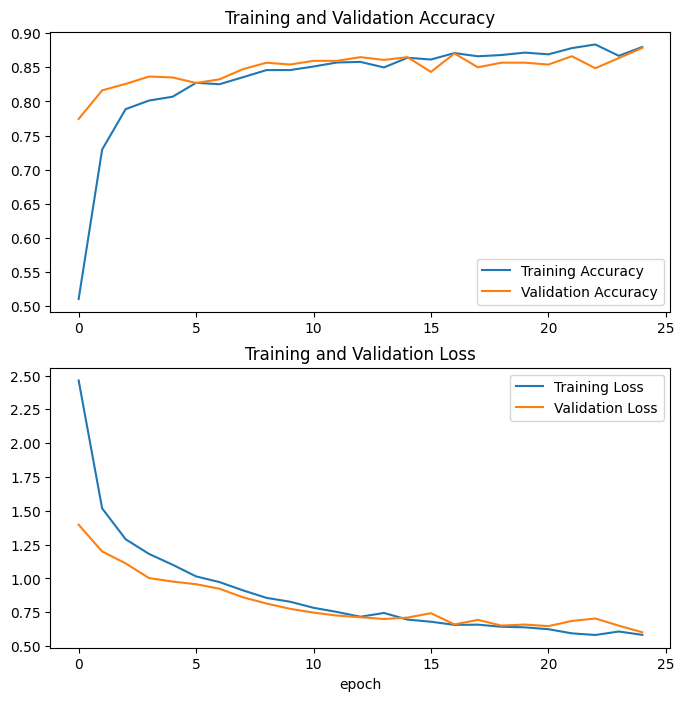

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

plt.show()

# Evaluate The Model

In [26]:
eval_results = model.evaluate(test_set, verbose=0)

for metric, value in zip(model.metrics_names, eval_results):
    print(metric + ': {:.3}'.format(value))

loss: 0.563
accuracy: 0.892


8/8 [==============================] - 4s 118ms/step
                    precision    recall  f1-score   support

Ayam Goreng Tepung       0.75      0.67      0.71         9
              Baju       1.00      1.00      1.00        11
             Bakso       0.95      1.00      0.97        19
            Celana       1.00      1.00      1.00        10
            Dompet       1.00      1.00      1.00        11
              Gaun       1.00      1.00      1.00         7
        Jam Tangan       1.00      1.00      1.00         9
               Jus       1.00      1.00      1.00        13
          Kacamata       1.00      1.00      1.00        10
         Kaos Kaki       1.00      1.00      1.00         9
           Keripik       0.82      0.90      0.86        10
              Kopi       1.00      1.00      1.00        12
            MakeUp       1.00      0.82      0.90        11
    Martabak Manis       1.00      0.89      0.94         9
          Mie Ayam       1.00      0.83      0

Text(70.7222222222222, 0.5, 'True Label')

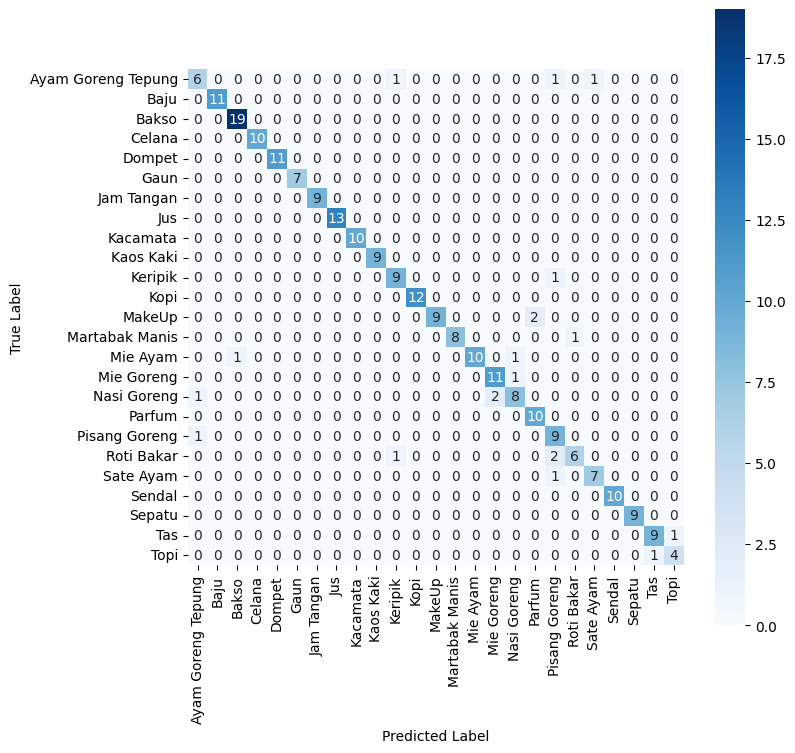

In [27]:
model_pred = model.predict(x_test)
model_pred = np.argmax(model_pred, axis=1)
curr_y_test = np.argmax(y_test, axis=1)
model_pred = model_pred.reshape(1, -1)[0]

print(classification_report(curr_y_test, model_pred, target_names=class_names))
confusion_matrix = confusion_matrix(curr_y_test, model_pred)

df_cm = pd.DataFrame(confusion_matrix, index = [i for i in class_names],
                  columns = [i for i in class_names])

plt.figure(figsize = (8, 8))
sns.heatmap(df_cm, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


# Fine Tuning for Get a Better Accuracy

Unfreeze Last 15 Layers and Include Them in Training Process

In [28]:
fine_tune_at = 15

for layer in xception_model.layers[-fine_tune_at:]:
    layer.trainable = True

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

Displays the Number of Layers to be Trained in Fine Tuning

In [29]:
len(model.trainable_variables)

25

Compile The Model for Fine Tuning

In [30]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(),
  metrics=['accuracy']
)

Train The Model For Fine Tuning

In [31]:
fine_tune_epoch = 25
total_epochs = initial_epochs + fine_tune_epoch

history_fine = model.fit(
    train_set,
    validation_data=val_set,
    epochs=total_epochs,
    verbose=1,
    shuffle=True,
    initial_epoch=history.epoch[-1],
    callbacks=[callbacks]
    )

Epoch 25/50
24/24 [==============================] - 161s 6s/step - loss: 0.8770 - accuracy: 0.7979 - val_loss: 1.1924 - val_accuracy: 0.7946
Epoch 26/50
24/24 [==============================] - 139s 6s/step - loss: 0.5826 - accuracy: 0.8751 - val_loss: 0.8123 - val_accuracy: 0.8514
Epoch 27/50
24/24 [==============================] - 139s 6s/step - loss: 0.4531 - accuracy: 0.9072 - val_loss: 0.7620 - val_accuracy: 0.8486
Epoch 28/50
24/24 [==============================] - 139s 6s/step - loss: 0.3784 - accuracy: 0.9256 - val_loss: 0.7421 - val_accuracy: 0.8649
Epoch 29/50
24/24 [==============================] - 139s 6s/step - loss: 0.3327 - accuracy: 0.9379 - val_loss: 0.7614 - val_accuracy: 0.8568
Epoch 30/50
24/24 [==============================] - 139s 6s/step - loss: 0.3039 - accuracy: 0.9417 - val_loss: 0.6504 - val_accuracy: 0.8811
Epoch 31/50
24/24 [==============================] - 139s 6s/step - loss: 0.2835 - accuracy: 0.9460 - val_loss: 0.5795 - val_accuracy: 0.8892
Epoch 

## Display the Learning Curves After Fine Tuning

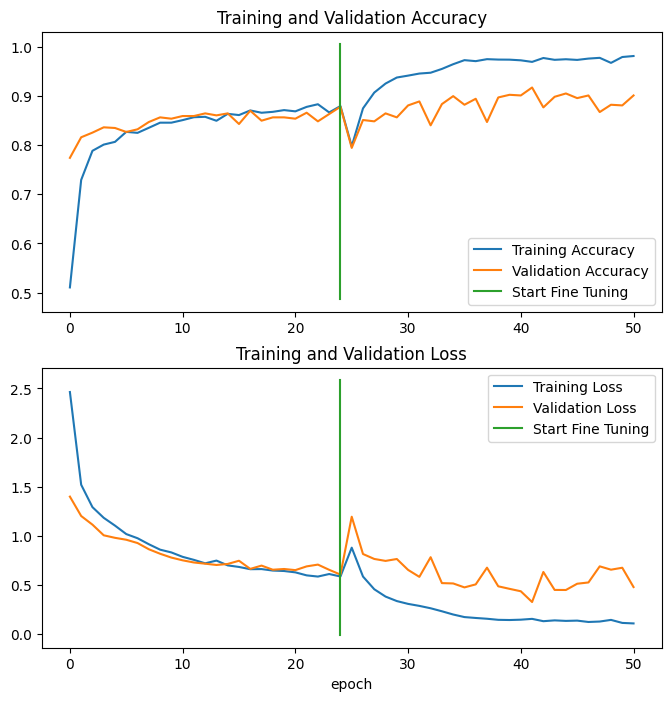

In [32]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

plt.show()

## Evaluate Model After Fine Tuning

In [33]:
eval_fine_results = model.evaluate(test_set, verbose=0)

for metric, value in zip(model.metrics_names, eval_fine_results):
    print(metric + ': {:.3}'.format(value))

loss: 0.38
accuracy: 0.914


8/8 [==============================] - 1s 137ms/step
                    precision    recall  f1-score   support

Ayam Goreng Tepung       0.75      0.67      0.71         9
              Baju       1.00      0.91      0.95        11
             Bakso       0.95      1.00      0.97        19
            Celana       0.91      1.00      0.95        10
            Dompet       1.00      1.00      1.00        11
              Gaun       1.00      1.00      1.00         7
        Jam Tangan       1.00      1.00      1.00         9
               Jus       0.81      1.00      0.90        13
          Kacamata       1.00      1.00      1.00        10
         Kaos Kaki       1.00      0.89      0.94         9
           Keripik       0.80      0.80      0.80        10
              Kopi       1.00      0.83      0.91        12
            MakeUp       1.00      0.91      0.95        11
    Martabak Manis       1.00      0.89      0.94         9
          Mie Ayam       1.00      0.75      0

Text(95.7222222222222, 0.5, 'True Label')

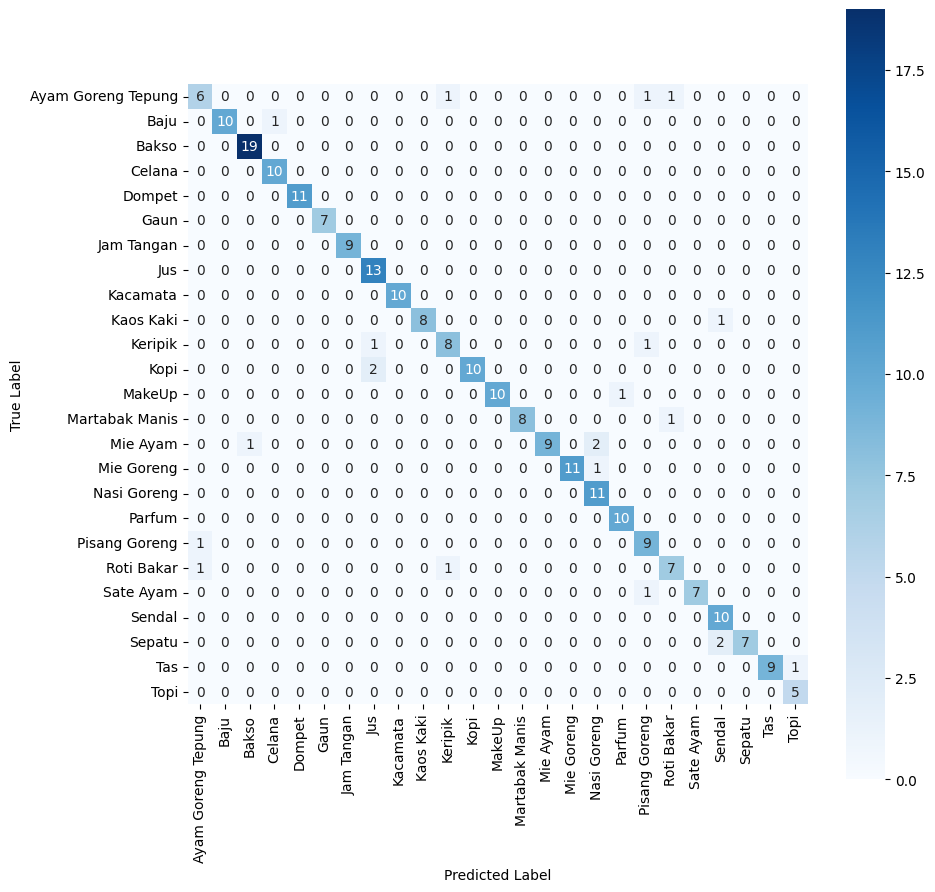

In [36]:
model_fine_pred = model.predict(x_test)
model_fine_pred = np.argmax(model_fine_pred, axis=1)
curr_y_fine_test = np.argmax(y_test, axis=1)
model_fine_pred = model_fine_pred.reshape(1, -1)[0]

print(classification_report(curr_y_fine_test, model_fine_pred, target_names = class_names))
confusion_matrix_fine = confusion_matrix(curr_y_fine_test, model_fine_pred)

df_cm_fine = pd.DataFrame(confusion_matrix_fine, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10, 10))
sns.heatmap(df_cm_fine, annot=True, square=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Testing on New Data

In [37]:
image_path = '/content/gdrive/MyDrive/Coba-Coba/S__35954745.jpg'
new_img = image.load_img(image_path, target_size=IMG_SIZE)
img1 = image.img_to_array(new_img)
img1 = np.expand_dims(img1, axis=0)
img1 = img1/255

1/1 [==============================] - 2s 2s/step
{'Class': 'Parfum', 'Probability': 0.9995426}


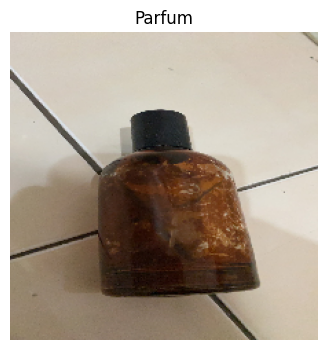

In [38]:
img1_class = model.predict(img1)
img1_class_index = np.argmax(img1_class)
classname = class_names[img1_class_index]
img_prob = np.max(img1_class)
prediction_prob = img_prob.max()

pred_dict = {'Class':classname, 'Probability': prediction_prob}
print(pred_dict)

plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(classname)
plt.show()

## Save Model to .H5 Format

In [39]:
model.save(os.path.join('/content/gdrive/MyDrive/Model/Model Xception', 'xception_image_classifier.h5'))

In [40]:
model.save_weights(os.path.join('/content/gdrive/MyDrive/Model/Model Xception', 'xception_weight_image_classifier.hdf5'))

## Load Save Model

In [41]:
# Change directory to folder Model ML
%cd '/content/gdrive/MyDrive/Model/Model Xception'

/content/gdrive/MyDrive/Model/Model Xception


In [42]:
model_xcep = load_model('xception_image_classifier.h5')
model_xcep.load_weights('xception_weight_image_classifier.hdf5')

Saving S__34070543.jpg to S__34070543.jpg
1/1 [==============================] - 0s 23ms/step
S__34070543.jpg
Jam Tangan


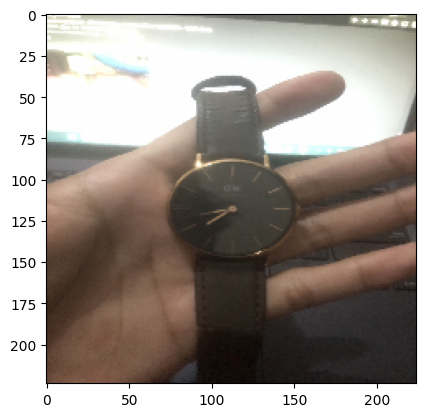

In [45]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # Predicting New Images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  images = np.vstack([x])
  prob = model_xcep.predict(images)[0]
  classes = int(prob.argmax(axis=-1))
  
  print(fn)
  print(class_names[classes])